In [36]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import copy
import datetime

# 기본 경로 설정
os.chdir('C:/Users/gksru/Desktop/study/Lpoint/제6회 L.POINT Big Data Competition')
# 폰트 설정
mpl.rc('font', family=' Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

### 1. 온라인 행동 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|SESS_ID|세션 ID| Web/App 에 접속 후 세션이 시작될 때 부여된 순번 ID<br>※하나의 클라이언트 ID 에 여러 개의 세션 ID 가 발급될 수 있음|v|
|3|HIT_SEQ|조회일련번호|조회 순서를 알 수 있도록 부여된 일련번호|v|
|4|ACTION_TYPE|조회일련번호|총 8 가지의 행동 유형을 구분한 코드<br>[0.검색 / 1.제품 목록 / 2.제품 세부정보 보기<br> / 3.장바구니 제품 추가/4.장바구니 제품 삭제 / 5.결제 시도 <br>/ 6.구매 완료 / 7.구매 환불 / 8.결제 옵션 ]||
|5|BIZ_UNIT|업종단위|온라인 및 오프라인 이용처를 구분하는 단위코드||
|6|SESS_DT|세션일자|세션일자 (YYYYMMDD 형식으로 표시)||
|7|HIT_TM|조회시각|조회시각 (HH:MM 형식으로 표시)||
|8|HIT_PSS_TM|조회일련번호|세션이 시작된 이후 해당 조회까지 경과한 시간<br>(단위 : 밀리초)<br>※ 첫 번째 조회이면 0 으로 설정됩니다.||
|9|TRANS_ID|거래 ID|구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID||
|10|SRCH_KWD|검색 키워드|고객이 검색한 키워드||
|11|TOT_PAG_VIEW_CT|총페이지조회건수|세션 내의 총 페이지(화면)뷰 수||
|12|TOT_SESS_HR_V|총세션시간값|세션 내 총 시간(단위: 초)||
|13|TRFC_SRC|유입채널|고객이 유입된 채널<br>[DIRECT / PUSH / WEBSITE / PORTAL_1 / PORTAL_2 / PORTAL_3 / unknown]||
|14|DVC_CTG_NM|기기유형|기기 유형 [mobile_web / mobile_app / PC]||


In [17]:
online_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
online_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


### 2. 거래 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|TRANS_ID|거래 ID|구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID |v|
|3|TRANS_SEQ|거래일련번호|해당 거래 ID 의 구매 내역 내 구매 순서를 알 수 있도록<br> 부여된 일련번호|v|
|4|BIZ_UNIT|업종단위|온라인 및 오프라인 이용처를 구분하는 단위코드||
|5|PD_C|상품소분류코드|상품의 소분류코드||
|6|DE_DT|구매일자|상품을 구매한 일자 (YYYYMMDD 형식)||
|7|DE_TM|구매시각|상품을 구매한 시각 (HHMM 형식)||
|8|BUY_AM|구매금액|구매한 상품의 금액||
|9|BUY_CT|구매수량|구매한 상품의 수량||


In [18]:
trade_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
trade_data.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [19]:
trade_data['pd_c'].value_counts()

unknown    17652
1213       15518
0347       12914
0964       11115
1395       11083
           ...  
1541           1
0144           1
0512           1
0759           1
1639           1
Name: pd_c, Length: 1668, dtype: int64

### 3. 고객 Demographic 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|CLNT_GENDER|성별|성별정보<br> [남자 : M / 여자 : F / 정보없음 : unknown]||
|3|CLNT_AGE|연령대|연령대 정보<br>[10 대이하 / 20 대 / 30 대 / 40 대 / 50 대 / 60 대이상<br> / 정보없음 : unknown]||

In [20]:
demo_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
demo_data.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [21]:
online_data.drop_duplicates('clnt_id',keep = 'first')

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
13,30605,11,2,2,A03,20190820,23:24,54174,NaN,NaN,3.0,54.0,DIRECT,NaN
97,28304,1,3,3,A03,20190716,11:29,501434,NaN,NaN,56.0,1303.0,PUSH,mobile_web
113,43159,1,1,3,A03,20190830,21:35,42229,NaN,NaN,18.0,1248.0,DIRECT,PC
115,20011,1,6,4,A03,20190717,10:23,275765,NaN,NaN,18.0,350.0,DIRECT,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195850,59569,1,1,0,A02,20190821,15:36,13404,NaN,쿠쿠 hpf,4.0,32.0,unknown,mobile_web
3195851,34947,1,1,0,A02,20190826,09:41,8921,NaN,노니구미,3.0,9.0,unknown,PC
3196105,4738,1,1,0,A02,20190712,01:06,0,NaN,디스커버리여성반팔티,1.0,NaN,unknown,mobile_web
3196136,19454,1,1,0,A02,20190729,10:05,36846,NaN,볼링티,2.0,37.0,unknown,mobile_app


### 4. 상품 분류 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|PD_C|상품 소분류코드|상품의 소분류코드(최소단위)|v|
|2|CLAC1_NM|상품 대분류명|상품 대분류명||
|3|CLAC2_NM|상품 중분류명|상품 중분류명||
|4|CLAC3_NM|상품 소분류명|상품 소분류명||

In [ ]:
class_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')
class_data.head()

In [12]:
class_data

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades
...,...,...,...,...
1662,1663,Women's Clothing,Women's Upper Bodywear / Tops,Women's Cardigans
1663,1664,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweaters / Pullover
1664,1665,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweatshirts / Hoodies
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops


In [14]:
online_data.groupby('clnt_id').sum()['count']

clnt_id
1         10
2        249
3         10
4          2
5          1
        ... 
72425     25
72426      8
72427     26
72428      7
72429      2
Name: count, Length: 72399, dtype: int64

# EDA

In [26]:
online_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [25]:
online_data.dtypes

clnt_id              int64
sess_id              int64
hit_seq              int64
action_type          int64
biz_unit            object
sess_dt              int64
hit_tm              object
hit_pss_tm           int64
trans_id           float64
sech_kwd            object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src            object
dvc_ctg_nm          object
dtype: object

In [46]:
online_data.isna().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
month                    0
dtype: int64

In [40]:
online_data['sess_dt'] = online_data['sess_dt'].astype('str')
online_data['sess_dt'] = online_data['sess_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

In [42]:
online_data['month'] = online_data['sess_dt'].apply(lambda x: x.month)

In [93]:
online_data['hour'] = online_data['hit_tm'].apply(lambda x: int(x[:2]))

In [58]:
online_data['count'] = 1

In [59]:
online_action_count = online_data.groupby('action_type').count()['count']
online_action_count

action_type
0    651638
1    307998
2    655266
3    596765
4    172240
5    750530
6     56249
7      5676
Name: count, dtype: int64

0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 / 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션

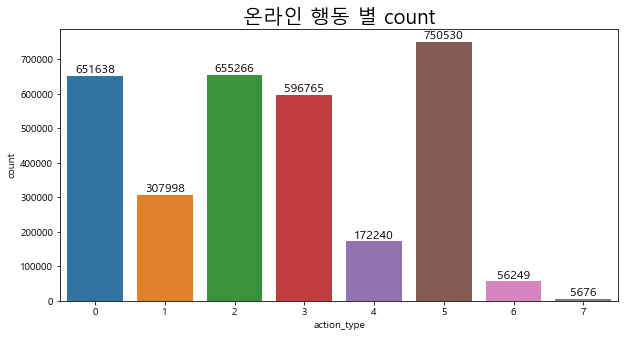

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(data = online_action_count.reset_index() , x = 'action_type', y = 'count')
y = list(online_action_count)
for i, v in enumerate(list(online_action_count.index)):
    plt.text(v, y[i], y[i],                 
             fontsize = 12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.title('온라인 행동 별 count',fontsize = 20)
plt.show()

* 결제 시도 횟수가 가장 많지만, 구매 완료에 대한 행동 정보는 유난히 적다.
* 구매를 하고 구매 완료 버튼을 눌러야 구매 완료가 되는 것인지??

In [86]:
online_month_action = online_data.groupby(['month','action_type']).count()['count'].reset_index()

In [ ]:
fig,axes=plt.subplots(nrows=12,ncols=2)
fig.set_size_inches(10,50)

for i in range(24):
    data_4_week=data_4[(data_4['주말여부']==0) & (data_4['대여일시(시간)']==i)]['이용시간']/datetime.timedelta(seconds=1)
    if i%2==0:
        t=0
    else:
        t=1
    sns.distplot(data_4_week[data_4_week<7200],ax=axes[i//2][t])
    axes[i//2][t].set_title('평일 {}~{}시 이용시간'.format(i,i+1,size=20))
plt.tight_layout()
plt.show()

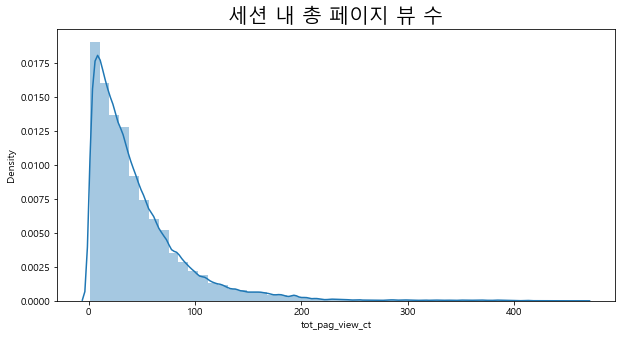

In [82]:
plt.figure(figsize=(10,5))
sns.distplot(online_data['tot_pag_view_ct'])
plt.title('세션 내 총 페이지 뷰 수', fontsize = 20)
plt.show()